# 朴素贝叶斯模型

## 算法原理

数据集$D=\{(\mathbf{x}^{(1)},y^{(1)}),(\mathbf{x}^{(2)},y^{(2)}),\cdots,(\mathbf{x}^{(N)},y^{(N)})\}$，其中$\mathbf{x}^{(i)}=(x^{(i)}_1,x^{(i)}_1,\cdots,x^{(i)}_M)$，$𝑦^{(i)}∈\{c_1,c_2,\cdots,c_K\}$属于$K$类中的一类。

根据贝叶斯定理，给定样本特征$x$，样本属于类别$y$的概率是
$$P(y | x)= \frac{P(xy)}{P(x)} = \frac{P(x | y) P(y)}{P(x)}$$

假设特征条件独立，则样本$x$为类别$c_k$的概率可以表示为
$$P\left(y=c_{k} | x\right)=\frac{\prod_{j=1}^{M} P\left(x_{j} | y=c_{k}\right) P\left(y=c_{k}\right)}{P(x)}$$

**学习过程** 
计算上式中的概率值
$$P(y=c_k) = \frac{\sum_{i=1}^N I(y^{(i)}=c_k)}{N}$$
其中$I(x)$为指示函数，若括号内成立，则为1，否则为0。
$$P(x_j=a_{jl}|y=c_k )= \frac{\sum_{i=1}^N I(x_j^{(i)}=a_{jl},y^{(i)}=c_k)}{\sum_{i=1}^N I(y^{(i)}=c_k))},$$
$$j=1,2,\cdots, M, \quad k=1,2,\cdots,K,\quad l=1,2,\cdots, L_j$$
其中$L_j$为第$j$个特征取值的个数。

**分类过程** 通过学到的概率，给定未分类新实例$X$，就可以通过上述概率进行计算，得到该实例属于各类的后验概率$P(y=c_k|X)$ ，计算如下：
 - 计算该实例属于$y=c_k$类的概率
 $$P\left(y=c_{k} | X\right)=\frac{\prod_{j=1}^{M} P\left(X_{j} | y=c_{k}\right) P\left(y=c_{k}\right)}{P(X)}$$
 - 确定该实例所属的类别 $y$
 $$𝑦 = \arg\max\limits_{𝑐_𝑘} \prod_{j=1}^{M} P\left(X_{j} | y=c_{k}\right) P\left(y=c_{k}\right)$$

## 例子

通过男生的四个特点分别是不帅，性格不好，身高矮，不上进，判断一下女生是嫁还是不嫁？

| 长相 | 性格 | 身高 | 是否上进 | 嫁否 | 
|:----:|:----:|:----:|:----:|:----:|
| 帅 | 不好 | 矮 | 不上进 | 不嫁 | 
| 不帅 | 好 | 矮 | 上进 | 不嫁 | 
| 帅 | 好 | 矮 | 上进 | 嫁 | 
| 不帅 | 好 | 高 | 上进 | 嫁 | 
| 帅 | 不好 | 矮 | 上进 | 不嫁 | 
| 不帅 | 不好 | 矮 | 不上进 | 不嫁 | 
| 帅 | 好 | 高 | 不上进 | 嫁 | 
| 不帅 | 好 | 高 | 上进 | 嫁 | 
| 帅 | 好 | 高 | 上进 | 嫁 | 
| 不帅 | 不好 | 高 | 上进 | 嫁 | 
| 帅 | 好 | 矮 | 不上进 | 不嫁 | 
| 帅 | 好 | 矮 | 不上进 | 不嫁 | 

先计算嫁的概率
\begin{align*}
&P(\text{嫁}|\text{不帅、性格不好、身高矮、不上进}) \\
&=\frac{P(\text{不帅、性格不好、身高矮、不上进}|\text{嫁})P(\text{嫁})}{P(\text{不帅、性格不好、身高矮、不上进})} \\
&=\frac{P(\text{不帅}|\text{嫁})P(\text{性格不好}|\text{嫁})P(\text{身高矮}|\text{嫁})P(\text{不上进}|\text{嫁})P(\text{嫁})}{ P(\text{不帅、性格不好、身高矮、不上进})} \\ 
&=\frac{\frac{3}{6}\frac{1}{6}\frac{1}{6}\frac{1}{6}\frac{6}{12}}{P(\text{不帅、性格不好、身高矮、不上进})} \\
&=\frac{\frac{1}{864}}{P(\text{不帅、性格不好、身高矮、不上进})}
\end{align*}

再计算不嫁的概率
\begin{align*}
&P(\text{不嫁}|\text{不帅、性格不好、身高矮、不上进}) \\
&=\frac{P(\text{不帅、性格不好、身高矮、不上进}|\text{不嫁})P(\text{不嫁})}{P(\text{不帅、性格不好、身高矮、不上进})} \\
&=\frac{P(\text{不帅}|\text{不嫁})P(\text{性格不好}|\text{不嫁})P(\text{身高矮}|\text{不嫁})P(\text{不上进}|\text{不嫁})P(\text{不嫁})}{ P(\text{不帅、性格不好、身高矮、不上进})} \\ 
&=\frac{\frac{2}{6}\frac{3}{6}\frac{6}{6}\frac{4}{6}\frac{6}{12}}{P(\text{不帅、性格不好、身高矮、不上进})} \\
&=\frac{\frac{1}{18}}{P(\text{不帅、性格不好、身高矮、不上进})}
\end{align*}

比较两个概率值
$$P(\text{嫁}|(\text{不帅、性格不好、身高矮、不上进})<P(\text{不嫁}|(\text{不帅、性格不好、身高矮、不上进})$$
得出结论：不嫁

## 调用sklearn 

In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB

X = [["帅","不好","矮","不上进"],
        ["不帅","好","矮","上进"],
        ["帅","好","矮","上进"],
        ["不帅","好","高","上进"],
        ["帅","不好","矮","上进"],
        ["不帅","不好","矮","不上进"],
        ["帅","好","高","不上进"],
        ["不帅","好","高","上进"],
        ["帅","好","高","上进"],
        ["不帅","不好","高","上进"],
        ["帅","好","矮","不上进"],
        ["帅","好","矮","不上进"]]
y = [0,0,1,1,0,0,1,1,1,1,0,0] #类别标签，1 嫁, 0 不嫁

enc = OrdinalEncoder()
enc.fit(X)
X_train = enc.transform(X) 
print(X_train)
clf = CategoricalNB()
clf.fit(X_train, y)

testEntry = np.array(["不帅","不好","矮","不上进"]).reshape(1, -1)
y_pred = clf.predict(enc.transform(testEntry))
print(y_pred)
# 预测每个类别的概率值
y_pred_proba = clf.predict_proba(enc.transform(testEntry))
print(y_pred_proba)

[[1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 1.]
 [0. 1. 1. 0.]
 [1. 1. 1. 0.]
 [0. 0. 1. 0.]
 [1. 1. 0. 1.]
 [1. 1. 0. 1.]]
[0]
[[0.92920354 0.07079646]]


## 实现朴素贝叶斯模型

In [2]:
from functools import reduce

def createVocabList(dataSet):
    """
    由数据集产生词典
    """
    vocabSet = set([])  #create empty set
    for document in dataSet:
        vocabSet = vocabSet | set(document) #union of the two sets
    return list(vocabSet)

def setOfWords2Vec(vocabList, inputSet):
    """
    将句子转成向量，向量的长度为词典中词的个数
    """
    returnVec = [0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] = 1
        else: 
            print ("the word: %s is not in my Vocabulary!" % word)
    return returnVec

def trainNB0(trainMatrix,trainCategory):
    """
    训练模型
    """
    numTrainDocs = len(trainMatrix) # 数据量
    numWords = len(trainMatrix[0]) # 向量长度
    pPositive = sum(trainCategory)/float(numTrainDocs) # 正例出现的概率
    p0Num = np.zeros(numWords); 
    p1Num = np.zeros(numWords) 
 
    p0Denom = 0.0
    p1Denom = 0.0                        
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:
            # 注意分子是一个向量
            p1Num += trainMatrix[i]
            p1Denom += 1
            
        else:
            p0Num += trainMatrix[i]
            p0Denom += 1
            
    # 分别存的是在两个类别下，每个特征取值的概率
    p1Vect = p1Num/p1Denom          
    p0Vect = p0Num/p0Denom
    return p0Vect,p1Vect,pPositive

def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
    """
    使用训练结果进行分类
    """
    p1 = vec2Classify * p1Vec 
    p0 = vec2Classify * p0Vec 
    p1 = reduce(lambda x,y:x*y,[item for item in p1 if item != 0 ])*pClass1
    p0 = reduce(lambda x,y:x*y,[item for item in p0 if item != 0 ])*(1 - pClass1)
    print(p1,p0)
    if p1 > p0:
        return 1
    else: 
        return 0

myVocabList = createVocabList(X)
print(myVocabList)

trainMat=[]
for item in X:
    trainMat.append(setOfWords2Vec(myVocabList, item))
p0V,p1V,pAb = trainNB0(np.array(trainMat),np.array(y))
print(p0V,p1V,pAb)

testEntry = ["不帅","不好","矮","不上进"]
thisDoc = np.array(setOfWords2Vec(myVocabList, testEntry))
print (testEntry,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb))

testEntry = ["帅","好","高","上进"]
thisDoc = np.array(setOfWords2Vec(myVocabList, testEntry))
print (testEntry,'classified as: ',classifyNB(thisDoc,p0V,p1V,pAb))
    

['好', '上进', '不上进', '高', '不帅', '矮', '不好', '帅']
[0.5        0.33333333 0.66666667 0.         0.33333333 1.
 0.5        0.66666667] [0.83333333 0.83333333 0.16666667 0.83333333 0.5        0.16666667
 0.16666667 0.5       ] 0.5
0.0011574074074074073 0.05555555555555555
['不帅', '不好', '矮', '不上进'] classified as:  0
0.14467592592592596 0.05555555555555555
['帅', '好', '高', '上进'] classified as:  1


## 情感分析

In [3]:
X_train = ['my dog has flea problems help please my dog has flea problems help please',
             'maybe not take him to dog park stupid',
             'my dalmation is so cute I love him',
             'stop posting stupid worthless garbage',
             'mr licks ate my steak how to stop him',
             'quit buying worthless dog food stupid']
y_train = [0,1,0,1,0,1]    #类别标签，1 is abusive, 0 not

In [4]:
# 从sklearn.feature_extraction.text里导入文本特征向量化模块
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.naive_bayes import MultinomialNB     
from sklearn.metrics import classification_report

#文本特征向量化，词频作为特征
vec = CountVectorizer()
# X 是稀疏矩阵，类型为scipy.sparse.csr.csr_matrix
X = vec.fit_transform(X_train)
print(X)

#使用朴素贝叶斯进行训练
mnb = MultinomialNB()   # 使用默认配置初始化朴素贝叶斯
mnb.fit(X,y_train)    # 利用训练数据对模型参数进行估计

testEntry = ['love my dalmation']
pred = mnb.predict(vec.transform(testEntry))
print(pred)

  (0, 17)	2
  (0, 4)	2
  (0, 8)	2
  (0, 5)	2
  (0, 22)	2
  (0, 9)	2
  (0, 20)	2
  (1, 4)	1
  (1, 15)	1
  (1, 18)	1
  (1, 28)	1
  (1, 10)	1
  (1, 29)	1
  (1, 19)	1
  (1, 27)	1
  (2, 17)	1
  (2, 10)	1
  (2, 3)	1
  (2, 12)	1
  (2, 24)	1
  (2, 2)	1
  (2, 14)	1
  (3, 27)	1
  (3, 26)	1
  (3, 21)	1
  (3, 30)	1
  (3, 7)	1
  (4, 17)	1
  (4, 10)	1
  (4, 29)	1
  (4, 26)	1
  (4, 16)	1
  (4, 13)	1
  (4, 0)	1
  (4, 25)	1
  (4, 11)	1
  (5, 4)	1
  (5, 27)	1
  (5, 30)	1
  (5, 23)	1
  (5, 1)	1
  (5, 6)	1
[0]


In [5]:
# 从sklearn.feature_extraction.text里导入文本特征向量化模块
from sklearn.feature_extraction.text import TfidfVectorizer

#文本特征向量化，tfidf作为特征
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X_train)
print(X)

#使用朴素贝叶斯进行训练
mnb = MultinomialNB() 
mnb.fit(X,y_train)   

tfidf.transform(testEntry)
testEntry = ['love my dalmation']
pred = mnb.predict(tfidf.transform(testEntry))

print(pred)

  (0, 20)	0.40966431929307107
  (0, 9)	0.40966431929307107
  (0, 22)	0.40966431929307107
  (0, 5)	0.40966431929307107
  (0, 8)	0.40966431929307107
  (0, 4)	0.2836156972830696
  (0, 17)	0.2836156972830696
  (1, 27)	0.28007245489665356
  (1, 19)	0.4045463374809687
  (1, 29)	0.33173378384997615
  (1, 10)	0.28007245489665356
  (1, 28)	0.4045463374809687
  (1, 18)	0.4045463374809687
  (1, 15)	0.4045463374809687
  (1, 4)	0.28007245489665356
  (2, 14)	0.40966431929307107
  (2, 2)	0.40966431929307107
  (2, 24)	0.40966431929307107
  (2, 12)	0.40966431929307107
  (2, 3)	0.40966431929307107
  (2, 10)	0.2836156972830696
  (2, 17)	0.2836156972830696
  (3, 7)	0.5113672547493431
  (3, 30)	0.41932846410444796
  (3, 21)	0.5113672547493431
  (3, 26)	0.41932846410444796
  (3, 27)	0.3540259028995622
  (4, 11)	0.37002943283285533
  (4, 25)	0.37002943283285533
  (4, 0)	0.37002943283285533
  (4, 13)	0.37002943283285533
  (4, 16)	0.37002943283285533
  (4, 26)	0.3034294282673573
  (4, 29)	0.3034294282673573
  

## 新闻语料分类器

In [6]:
from sklearn.datasets import fetch_20newsgroups  # 从sklearn.datasets里导入新闻数据抓取器 fetch_20newsgroups
from sklearn.model_selection import  train_test_split
from sklearn.feature_extraction.text import CountVectorizer  # 从sklearn.feature_extraction.text里导入文本特征向量化模块
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.naive_bayes import MultinomialNB     # 从sklean.naive_bayes里导入朴素贝叶斯模型
from sklearn.metrics import classification_report

#1.数据获取
news = fetch_20newsgroups(subset='all')
print(len(news.data))  # 输出数据的条数：18846

#2.数据预处理：训练集和测试集分割，文本特征向量化
X_train,X_test,y_train,y_test = train_test_split(news.data,news.target,test_size=0.25,random_state=33) # 随机采样25%的数据样本作为测试集
#print X_train[0]  #查看训练样本
#print y_train[0:100]  #查看标签

#词频文本特征向量化
# vec = CountVectorizer()
# X_train = vec.fit_transform(X_train)
# X_test = vec.transform(X_test)

# tfidf文本特征向量化
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

#3.使用朴素贝叶斯进行训练
mnb = MultinomialNB()   # 使用默认配置初始化朴素贝叶斯
mnb.fit(X_train,y_train)    # 利用训练数据对模型参数进行训练
y_predict = mnb.predict(X_test)     

#4.获取结果报告
print('The Accuracy of Naive Bayes Classifier is:', mnb.score(X_test,y_test))
print(classification_report(y_test, y_predict, target_names = news.target_names))

18846
The Accuracy of Naive Bayes Classifier is: 0.8463497453310697
                          precision    recall  f1-score   support

             alt.atheism       0.84      0.67      0.75       201
           comp.graphics       0.85      0.74      0.79       250
 comp.os.ms-windows.misc       0.82      0.85      0.83       248
comp.sys.ibm.pc.hardware       0.76      0.88      0.82       240
   comp.sys.mac.hardware       0.94      0.84      0.89       242
          comp.windows.x       0.96      0.84      0.89       263
            misc.forsale       0.93      0.69      0.79       257
               rec.autos       0.84      0.92      0.88       238
         rec.motorcycles       0.98      0.92      0.95       276
      rec.sport.baseball       0.96      0.91      0.94       251
        rec.sport.hockey       0.88      0.99      0.93       233
               sci.crypt       0.73      0.98      0.83       238
         sci.electronics       0.91      0.83      0.87       249
       

如果数据下载很慢或是下载失败，可以手动下载。然后

将文件 C:/Users/lei/.conda/envs/shumo/Lib/site-packages/sklearn/datasets/_twenty_newsgroups.py 73行

archive_path = _fetch_remote(ARCHIVE, dirname=target_dir)

改为
archive_path = 下载的文件存放位置<br>
例如：archive_path = "C:/Users/lei/.conda/envs/shumo/Lib/site-packages/sklearn/datasets/data/20newsbydate.tar.gz"

## 使用卡方检验进行特征选择

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#1.数据获取
news = fetch_20newsgroups(subset='all')
print(len(news.data))  # 输出数据的条数：18846

#2.数据预处理：训练集和测试集分割，文本特征向量化
X_train,X_test,y_train,y_test = train_test_split(news.data,news.target,test_size=0.25,random_state=33) # 随机采样25%的数据样本作为测试集
#print X_train[0]  #查看训练样本
#print y_train[0:100]  #查看标签

#词频文本特征向量化
# vec = CountVectorizer()
# X_train = vec.fit_transform(X_train)
# X_test = vec.transform(X_test)

# tfidf文本特征向量化
tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
print("选择特征前数据维度：",X_train.shape[1])

#3. 特征选择
select_model = SelectKBest(chi2, k=10000)#选择k个最佳特征
X_train = select_model.fit_transform(X_train,y_train)
X_test = select_model.transform(X_test)
print("选择特征后数据维度：",X_train.shape[1])


#4.使用朴素贝叶斯进行训练
mnb = MultinomialNB()   # 使用默认配置初始化朴素贝叶斯
mnb.fit(X_train,y_train)    # 利用训练数据对模型参数进行训练
y_predict = mnb.predict(X_test)

#5.获取结果报告
print('The Accuracy of Naive Bayes Classifier is:', mnb.score(X_test,y_test))
print(classification_report(y_test, y_predict, target_names = news.target_names))

18846
选择特征前数据维度： 150725
选择特征后数据维度： 10000
The Accuracy of Naive Bayes Classifier is: 0.8529286926994907
                          precision    recall  f1-score   support

             alt.atheism       0.86      0.74      0.79       201
           comp.graphics       0.81      0.75      0.78       250
 comp.os.ms-windows.misc       0.78      0.85      0.81       248
comp.sys.ibm.pc.hardware       0.73      0.84      0.78       240
   comp.sys.mac.hardware       0.91      0.85      0.88       242
          comp.windows.x       0.93      0.85      0.88       263
            misc.forsale       0.92      0.73      0.81       257
               rec.autos       0.87      0.92      0.89       238
         rec.motorcycles       0.97      0.93      0.95       276
      rec.sport.baseball       0.95      0.93      0.94       251
        rec.sport.hockey       0.88      0.98      0.93       233
               sci.crypt       0.82      0.97      0.89       238
         sci.electronics       0.89   

# 逻辑回归

**逻辑回归模型** 二项逻辑回归模型是如下的条件概率分布：
$$P(Y=1|X)=\frac{1}{1 + \textrm{exp}(-(w \cdot X + b))}$$
$$P(Y=0|X)=\frac{\textrm{exp}(-(w\cdot x +b))}{1 + \textrm{exp}(-(w \cdot X + b))}$$
其中，$X\in R^n$是输入，$Y \in \{0,1\}$是输出，$w\in R^n$和$b\in R$是参数。

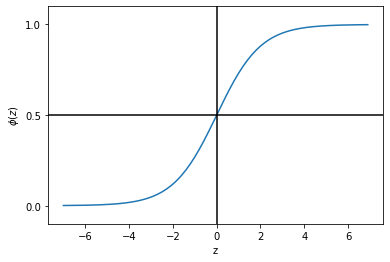

In [23]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7, 7, 0.1) # 从-7 到 7 画图
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhline(0.5, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi(z)$')
# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
plt.show()

对于二分问题，由贝叶斯定理

\begin{align*}
P(Y=1 | X) &=\frac{P(X | Y=1) P(Y=1)}{P(X)} \\
&=\frac{P(X | Y=1) P(Y=1)}{P(x | Y=1) P(Y=1)+ P(x | Y=0) P(Y=0)} \\
&=\frac{1}{1+\exp (-\alpha)}=\sigma(\alpha) \\
\end{align*}
其中 
$$\alpha=\ln \frac{P(X | Y=1) P(Y=1)}{P(X | Y=0) P(Y=0)}$$

生成模型例如朴素贝叶斯模型，估计条件概率$P(X|Y)$从而决定$\alpha$的值来分类。逻辑回归没有对条件概率进行估计，转而通过$w \cdot X + b$近似估计$\alpha$。 

若将二分类推广到的多分类问题$K>2$

\begin{align*}
P\left(Y_{i} | X\right) &=\frac{P\left(X | Y_{i}\right) P\left(Y_{i}\right)}{\sum_{j=1}^{K} P\left(X | Y_{j}\right) P\left(Y_{j}\right)} \\
&=\frac{\exp \left(a_{i}\right)}{\sum_{j=1}^{K} \exp \left(a_{j}\right)} \\
\end{align*}
其中 $$a_{j} =\ln \left(P\left(X | Y_{j}\right) P\left(Y_{j}\right)\right)$$

和二分问题类似，用$w \cdot X + b$近似估计$a_j$,这就是Softmax。

# 对数线性模型（log-linear model）

对数线性模型广泛地应用自然语言处理中，它最大的优点是可以在模型中使用丰富的特征。

**对数线性模型** 一个对数线性模型由以下部分构成：
- 输入集合 $\mathcal{X}$，
- 标签集合 $\mathcal{Y}$，$\mathcal{Y}$ 通常是一个有限集，
- 函数 $f: \mathcal{X} \times \mathcal{Y} \rightarrow \mathbb{R}^{d}$ 将 $(x, y)$ 映射为特征向量 $f(x, y)$，
- 参数向量 $v \in \mathbb{R}^{d}$，$d$ 为特征的个数。

对任意$x \in \mathcal{X},y \in \mathcal{Y}$, 模型定义一个条件概率
$$
p(y | x ; v)=\frac{\exp (v \cdot f(x, y))}{\sum_{y^{\prime} \in \mathcal{Y}} \exp \left(v \cdot f\left(x, y^{\prime}\right)\right)}
$$
这里$\exp (x)=e^{x},$ $v \cdot f(x, y)=\sum_{k=1}^{d} v_{k} f_{k}(x, y)$ 是 $v$ 和 $f(x, y)$的内积。 $p(y | x ; v)$ 理解为 $y$ 关于 $x$ 在参数$v$下的条件概率。

**为什么叫称作对数线性模型？**

\begin{align*}
\log p(y | x ; v) &=v \cdot f(x, y)-\log \sum_{y^{\prime} \in \mathcal{Y}} \exp \left(v \cdot f\left(x, y^{\prime}\right)\right) \\
&=v \cdot f(x, y)-g(x)
\end{align*}

其中
$$g(x)=\log \sum_{y^{\prime} \in \mathcal{Y}} \exp \left(v \cdot f\left(x, y^{\prime}\right)\right)$$
第一项$v \cdot f(x, y)$关于特征$f(x,y)$是线性的。第二项$g(x)$只依赖$x$，不依赖$y$。因此固定$x$，$\log p(y|x;v)$是特征$f(x,y)$的线性函数。

## 参数估计

考虑数据集 $\{x^{(i)}, y^{(i)}\}$,$i \in$ $\{1 \ldots n\}$, 其中 $x^{(i)} \in \mathcal{X}$, $y^{(i)} \in \mathcal{Y}$.
给定参数 $v,$ 对每个样本$i$,可以计算对数条件概率

$$ \log p\left(y^{(i)} | x^{(i)} ; v\right)$$

直观上理解，这个值越高模型对样本的拟合越好. 整个数据集的对数似然函数为
$$ L(v)=\sum_{i=1}^{n} \log p\left(y^{(i)} | x^{(i)} ; v\right) $$

使用最大似然估计寻找最优参数
$$v_{M L}=\arg \max _{v \in \mathbb{R}^{d}} L(v)$$